## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 11.9: plot the Lyman alpha forest as seen in an optical spectrum of QSO PSS1723+2243 at redshift 4.520

#### observations made with the Keck telescope and published by Prochaska et al. 2007 (https://ui.adsabs.harvard.edu/abs/2007ApJS..171...29P)
#### data downloaded from http://www.ucolick.org/~xavier/DLA/Spectra/HighRes/tab_esi.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from astropy.io import fits
from scipy.interpolate import spline
from scipy.interpolate import interp1d
%matplotlib inline

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


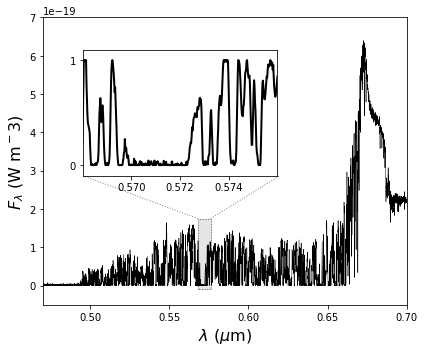

In [7]:
hdu1 = fits.open('PSS1723+2243_xF.fits')
hd1 = hdu1[0].header
flambda = hdu1[0].data
hdu1.close()

logwl = hd1['CRVAL1'] + (np.arange(hd1['NAXIS1']) - hd1['CRPIX1']) * hd1['CDELT1']
wl = 10**(logwl-4)              # microns

# "flux calibrate" based on Prochaska's plot that peaks at 4e-15 erg/s/cm2/A
flambda *= 4e-14 * flambda.max() / 1e7
flambda[flambda < 0] = 0

# plot the spectrum for the main part of the figure
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel(r"$\lambda$ ($\mu$m)", fontsize=16)
ax1.set_ylabel(r"$F_\lambda$ (W m$^-3$)", fontsize=16)
ax1.set_xlim(0.47, 0.7)
ax1.set_ylim(-0.5e-19, 7e-19)
ax1.plot(wl, flambda, color='k', lw=0.5)

# find the rolling maximum in small wavelength bins
# and fit a polynomial to get the continuum
dwl = 0.003
wl1 = np.arange(0.5, 0.65, dwl)
nc = wl1.size
wlpeak = np.zeros(nc)
fpeak = np.zeros(nc)
for i in range(nc-1):
    j = np.where(np.abs(wl-(wl1[i]+dwl/2)) > dwl/2)
    tmp = flambda.copy()
    tmp[j] = -1
    k = np.argmax(tmp)
    wlpeak[i] = wl[k]
    fpeak[i] = flambda[k]
#ax1.plot(wlpeak, fpeak, 'ro')
#p = np.polyfit(wlpeak, fpeak, 20)
#ax1.plot(wl, np.polyval(p,wl), 'b-')
continuum = interp1d(wlpeak, fpeak, bounds_error=False)
#ax1.plot(wl, continuum(wl), 'b-')

# make a rectangle over the region that I zoom into
xmin, xmax = 0.56801, 0.57599
y1, y2 = -0.1e-19, 1.75e-19
ax1.plot([xmin,xmin,xmax,xmax,xmin],[y1,y2,y2,y1,y1], 'k:', lw=1, alpha=0.5)
ax1.fill([xmin,xmin,xmax,xmax,xmin],[y1,y2,y2,y1,y1], color='black', alpha=0.1)

# create the axes for the inset plot
axis_to_data = ax1.transAxes + ax1.transData.inverted()
x3ax,y3ax = axis_to_data.transform(np.array([0.108,0.45]))
x4ax,y4ax = axis_to_data.transform(np.array([0.652,0.45]))
ax1.plot([xmin,x3ax], [y2,y3ax], 'k:', lw=1, alpha=0.5)
ax1.plot([xmax,x4ax], [y2,y4ax], 'k:', lw=1, alpha=0.5)

ax2 = fig.add_axes([0.2, 0.5, 0.45, 0.35])
xmin, xmax = 0.56801, 0.57599
ymin, ymax = -0.1, 1.1
y = flambda/continuum(wl)
y[y>1] = 1  # my continuum subtraction is rough and ready so I have fudged this for illustration purposes
ax2.plot(wl, y, color='k', lw=2)

ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
x_labels = ['0.570','0.572','0.574']
x_loc = np.array([float(x) for x in x_labels])
ax2.set_xticks(x_loc)
ax2.set_xticklabels(x_labels, fontsize=10)
y_labels = ['0','1']
y_loc = np.array([float(y) for y in y_labels])
ax2.set_yticks(y_loc)
ax2.set_yticklabels(y_labels, fontsize=10)

fig.tight_layout(rect=[0.0,0.0,1.0,1.0]) 
plt.savefig('qso.pdf')